In [1]:
import utils.notebooks as nb
from utils.loader import DicomDataset3D
from torch.utils.data import DataLoader
from monai.losses import DiceLoss
import torch
from models.WNet2 import WNetSingleOutput
from torch.utils.tensorboard import SummaryWriter

writer = SummaryWriter()

BATCH_SIZE = 4
EPOCHS = 1000
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = WNetSingleOutput(1).to(device)

train_dl = DataLoader(DicomDataset3D("data/train.csv"), batch_size=BATCH_SIZE)
validation_dl = DataLoader(DicomDataset3D("data/validation.csv"), batch_size=BATCH_SIZE)
test_dataloader = DataLoader(DicomDataset3D("data/test.csv"), batch_size=BATCH_SIZE)

optimizer = torch.optim.Adam(model.parameters(), lr=0.0005)
criterion = DiceLoss()
model.load_state_dict(torch.load('./state_dicts/wnet_more_augment/best/wnet_more_augment_epoch_180_loss_0.0001.pk'))

/home/casimir/UNI/WS_22/KAP/venv/lib/python3.11/site-packages/monai/networks/nets/unet.py:139: UserWarning: `len(strides) > len(channels) - 1`, the last 1 values of strides will not be used.
  warnings.warn(f"`len(strides) > len(channels) - 1`, the last {delta} values of strides will not be used.")


<All keys matched successfully>

torch.Size([4, 1, 64, 256, 256])


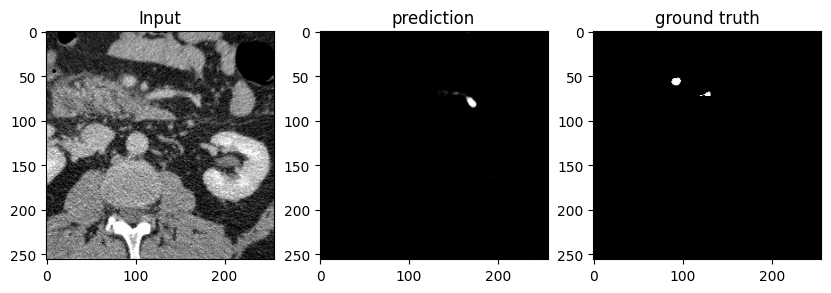

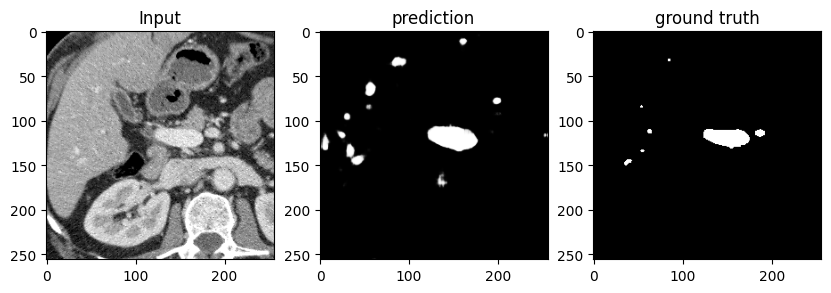

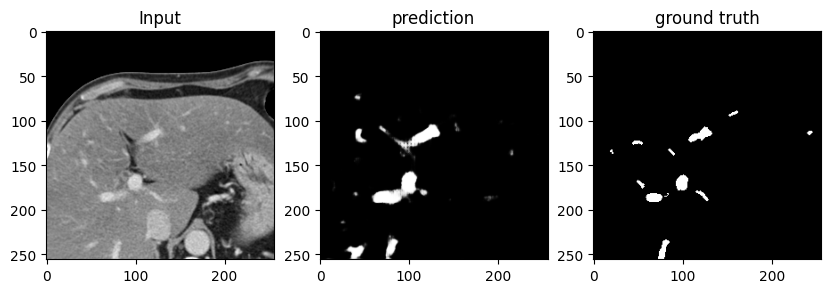

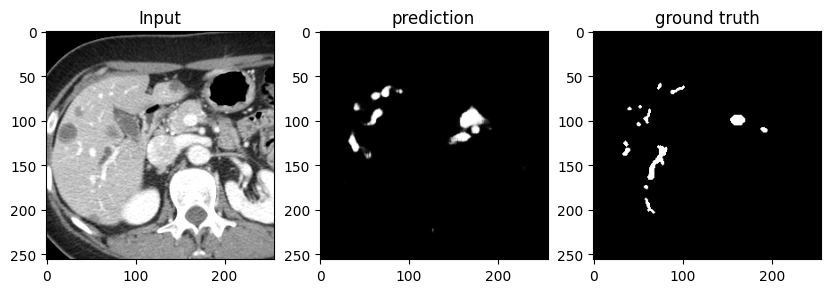

torch.Size([1, 1, 64, 256, 256])


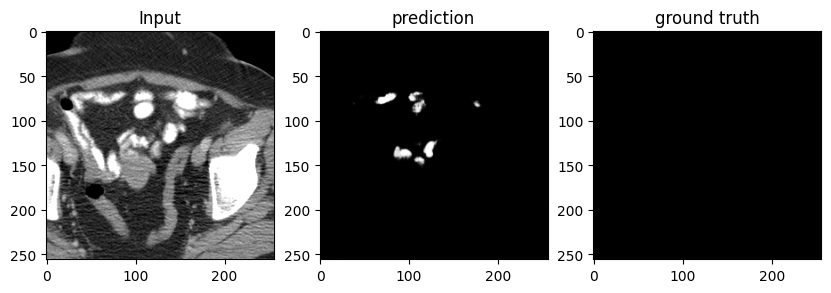

In [2]:
nb.plot_predictions(test_dataloader, model)